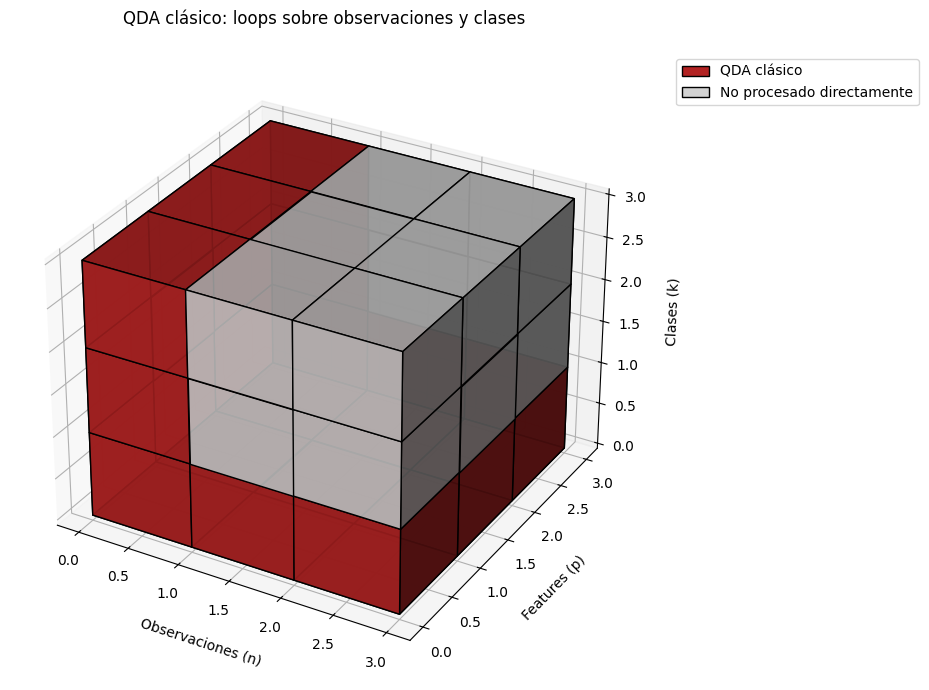

In [2]:
# Imports necesarios
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
from matplotlib.patches import Patch

# Función para graficar un cubo con zonas resaltadas
def plot_qda_model_cube(model_name, highlight_coords, color, explanation):
    n, p, k = 3, 3, 3  # dimensiones: observaciones, features, clases
    x, y, z = np.indices((n+1, p+1, k+1))
    voxels = (x < n) & (y < p) & (z < k)

    # Inicializar todos los colores como gris claro
    colors = np.full(voxels.shape, 'lightgray', dtype=object)

    # Asignar color resaltado a las coordenadas indicadas
    for i, j, l in highlight_coords:
        colors[i, j, l] = color

    # Crear la figura
    fig = plt.figure(figsize=(10, 7))
    ax = fig.add_subplot(111, projection='3d')
    ax.voxels(voxels, facecolors=colors, edgecolor='k', alpha=0.9)

    # Etiquetas de los ejes
    ax.set_xlabel('Observaciones (n)', labelpad=10)
    ax.set_ylabel('Features (p)', labelpad=10)
    ax.set_zlabel('Clases (k)', labelpad=10)
    ax.set_title(f'{model_name}: {explanation}', pad=20)

    # Leyenda
    legend_elements = [
        Patch(facecolor=color, edgecolor='k', label=f'{model_name}'),
        Patch(facecolor='lightgray', edgecolor='k', label='No procesado directamente')
    ]
    ax.legend(handles=legend_elements, loc='upper left', bbox_to_anchor=(1.05, 1))

    plt.tight_layout()
    plt.show()

# Coordenadas resaltadas para QDA clásico: loop sobre observaciones (i == 0) y clases (k == 0)
highlight_qda = [
    (i, j, k) for i in range(3) for j in range(3) for k in range(3)
    if i == 0 or k == 0
]

# Ejecutar gráfico
plot_qda_model_cube(
    model_name="QDA clásico",
    highlight_coords=highlight_qda,
    color='firebrick',
    explanation="loops sobre observaciones y clases"
)


### QDA clásico

El modelo QDA tradicional realiza predicciones utilizando **dos bucles explícitos**:

- Uno sobre las observaciones (`n`)
- Otro sobre las clases (`k`)

Para cada observación, se calcula la función cuadrática discriminante para cada clase, uno por uno.

---

**En el cubo**:
- Las celdas rojas (`firebrick`) muestran las zonas que se procesan secuencialmente a través de estos bucles.
- Las celdas grises son regiones que **no se procesan simultáneamente** en esta versión.

Este enfoque es computacionalmente costoso, especialmente para grandes cantidades de datos.


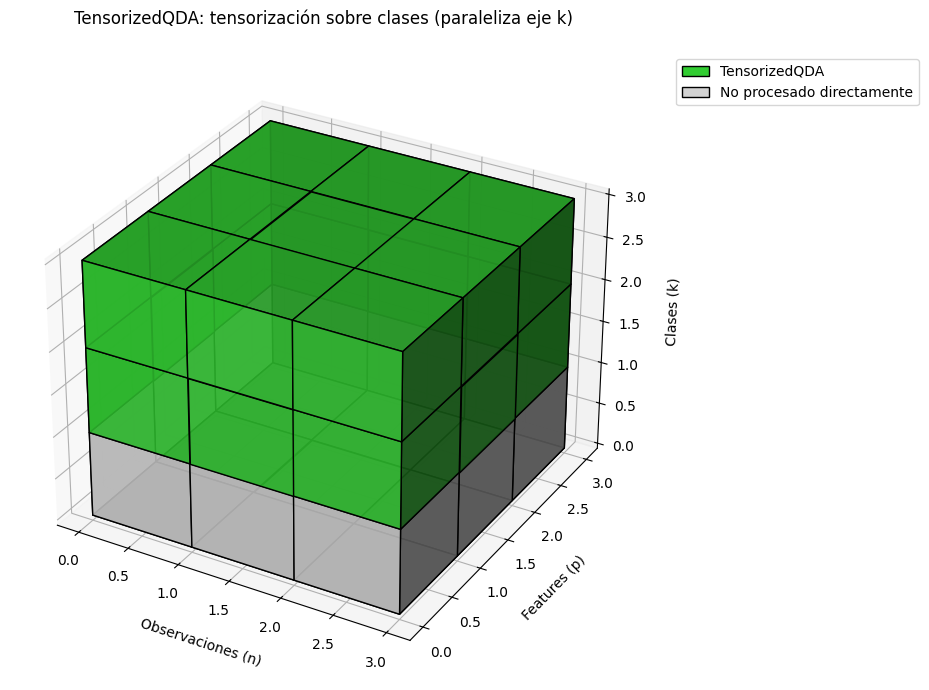

In [3]:
# Cubo para TensorizedQDA: se eliminan los loops sobre clases (se tensoriza en k)
highlight_tensorized = [(i, j, k) for i in range(3) for j in range(3) for k in range(3) if k != 0]

plot_qda_model_cube(
    model_name="TensorizedQDA",
    highlight_coords=highlight_tensorized,
    color='limegreen',
    explanation="tensorización sobre clases (paraleliza eje k)"
)


### TensorizedQDA

Este modelo mejora el QDA clásico al **eliminar el bucle sobre las clases** (`k`) y reemplazarlo por una operación vectorizada.

- Se procesan todas las clases simultáneamente mediante **tensorización** sobre el eje `k`.
- Sin embargo, todavía queda el bucle sobre las observaciones (`n`), por lo que no alcanza la eficiencia total.
- Esta optimización mejora significativamente el tiempo sin alterar el resultado de las predicciones.

En el cubo:
- Las celdas verdes representan las regiones que **se procesan en paralelo sobre las clases**.
- Las grises indican regiones no procesadas directamente en esta versión del modelo.


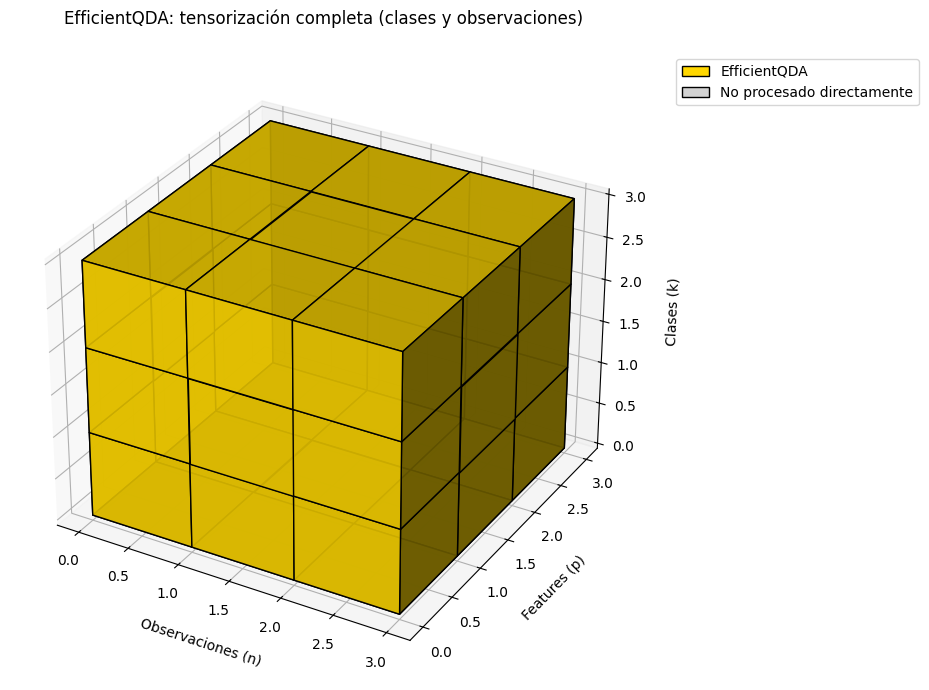

In [4]:
# Imports (solo si no los tenés ya en el notebook)
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
from matplotlib.patches import Patch

# Función para graficar el cubo (si no está definida aún)
def plot_qda_model_cube(model_name, highlight_coords, color, explanation):
    n, p, k = 3, 3, 3  # dimensiones: observaciones, features, clases
    x, y, z = np.indices((n+1, p+1, k+1))
    voxels = (x < n) & (y < p) & (z < k)

    # Inicializar todos los colores como gris claro
    colors = np.full(voxels.shape, 'lightgray', dtype=object)

    # Asignar color resaltado a las coordenadas indicadas
    for i, j, l in highlight_coords:
        colors[i, j, l] = color

    # Crear figura
    fig = plt.figure(figsize=(10, 7))
    ax = fig.add_subplot(111, projection='3d')
    ax.voxels(voxels, facecolors=colors, edgecolor='k', alpha=0.9)

    # Etiquetas
    ax.set_xlabel('Observaciones (n)', labelpad=10)
    ax.set_ylabel('Features (p)', labelpad=10)
    ax.set_zlabel('Clases (k)', labelpad=10)
    ax.set_title(f'{model_name}: {explanation}', pad=20)

    # Leyenda
    legend_elements = [
        Patch(facecolor=color, edgecolor='k', label=f'{model_name}'),
        Patch(facecolor='lightgray', edgecolor='k', label='No procesado directamente')
    ]
    ax.legend(handles=legend_elements, loc='upper left', bbox_to_anchor=(1.05, 1))

    plt.tight_layout()
    plt.show()

# Coordenadas resaltadas para EfficientQDA: se procesa todo el cubo
highlight_efficient = [(i, j, k) for i in range(3) for j in range(3) for k in range(3)]

# Ejecutar el gráfico
plot_qda_model_cube(
    model_name="EfficientQDA",
    highlight_coords=highlight_efficient,
    color='gold',
    explanation="tensorización completa (clases y observaciones)"
)


### EfficientQDA

Esta versión representa el máximo nivel de optimización antes de aplicar mejoras con Cholesky.

- Se elimina el bucle tanto sobre las observaciones (`n`) como sobre las clases (`k`).
- Se aprovecha la **tensorización completa** para calcular todas las funciones cuadráticas discriminantes en una sola pasada.
- También se evita construir matrices \( n \times n \), reemplazándolas por sumas de productos vectorizados.

**En el cubo**:
- Todas las celdas están resaltadas en amarillo, indicando que **todas las combinaciones** de observación, variable y clase se procesan de forma **vectorizada y simultánea**.


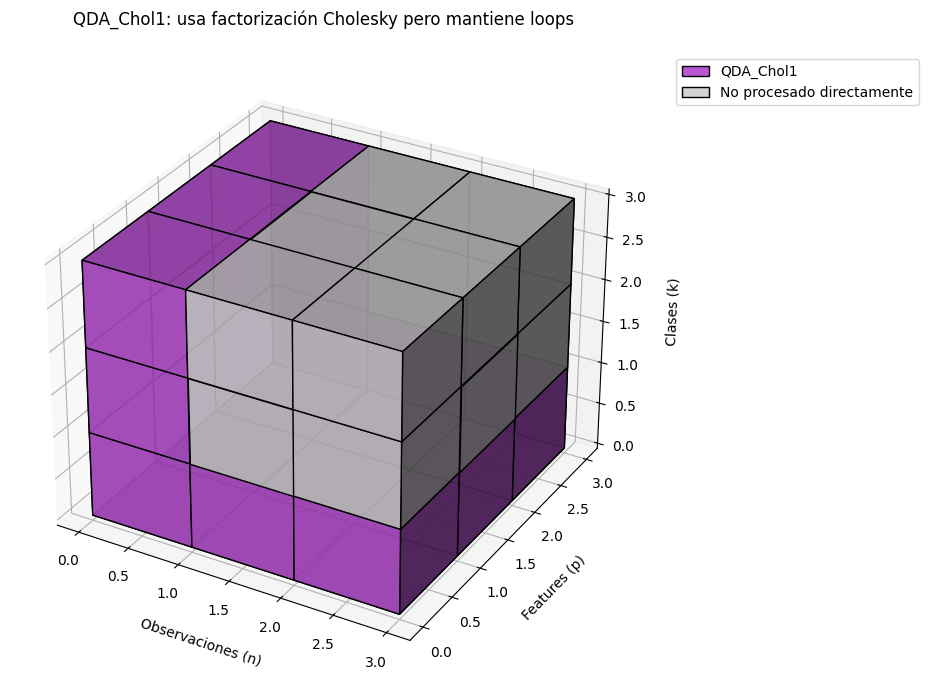

In [5]:
# Imports necesarios (si aún no los tenés en tu notebook)
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
from matplotlib.patches import Patch

# Función reutilizable para graficar un cubo
def plot_qda_model_cube(model_name, highlight_coords, color, explanation):
    n, p, k = 3, 3, 3
    x, y, z = np.indices((n+1, p+1, k+1))
    voxels = (x < n) & (y < p) & (z < k)

    # Inicialización del color base gris
    colors = np.full(voxels.shape, 'lightgray', dtype=object)

    # Resaltar las celdas deseadas
    for i, j, l in highlight_coords:
        colors[i, j, l] = color

    # Generar gráfico
    fig = plt.figure(figsize=(10, 7))
    ax = fig.add_subplot(111, projection='3d')
    ax.voxels(voxels, facecolors=colors, edgecolor='k', alpha=0.9)

    # Etiquetas
    ax.set_xlabel('Observaciones (n)', labelpad=10)
    ax.set_ylabel('Features (p)', labelpad=10)
    ax.set_zlabel('Clases (k)', labelpad=10)
    ax.set_title(f'{model_name}: {explanation}', pad=20)

    # Leyenda
    legend_elements = [
        Patch(facecolor=color, edgecolor='k', label=f'{model_name}'),
        Patch(facecolor='lightgray', edgecolor='k', label='No procesado directamente')
    ]
    ax.legend(handles=legend_elements, loc='upper left', bbox_to_anchor=(1.05, 1))
    plt.tight_layout()
    plt.show()

# Definir celdas activas para QDA_Chol1: mantiene loops sobre observaciones y clases
highlight_chol1 = [(i, j, k) for i in range(3) for j in range(3) for k in range(3) if i == 0 or k == 0]

# Generar cubo
plot_qda_model_cube(
    model_name="QDA_Chol1",
    highlight_coords=highlight_chol1,
    color='mediumorchid',
    explanation="usa factorización Cholesky pero mantiene loops"
)


### QDA_Chol1

Esta versión reemplaza la inversión directa de la matriz de covarianza \( \Sigma \) por su factorización de Cholesky:  
\[
\Sigma^{-1} = L^{-T} L^{-1}
\]

- Se reduce el costo computacional al usar **matrices triangulares** (más eficientes de invertir).
- **Pero** mantiene los bucles sobre observaciones (`n`) y clases (`k`), por lo que **no mejora los tiempos de predicción**.

**En el cubo**:
- Las celdas violetas indican que sigue habiendo procesamiento individual por observación y clase.
- Lo que mejora es el costo por cada operación, **no la cantidad de operaciones**.


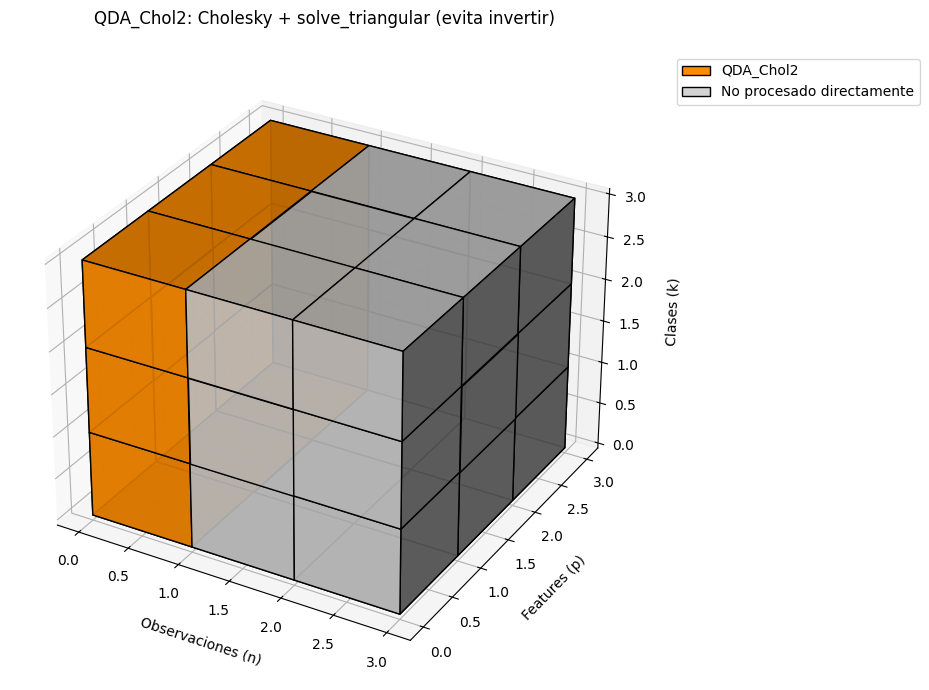

In [6]:
# Imports (si aún no los tenés definidos)
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
from matplotlib.patches import Patch

# Función para graficar cubos
def plot_qda_model_cube(model_name, highlight_coords, color, explanation):
    n, p, k = 3, 3, 3
    x, y, z = np.indices((n+1, p+1, k+1))
    voxels = (x < n) & (y < p) & (z < k)

    colors = np.full(voxels.shape, 'lightgray', dtype=object)

    for i, j, l in highlight_coords:
        colors[i, j, l] = color

    fig = plt.figure(figsize=(10, 7))
    ax = fig.add_subplot(111, projection='3d')
    ax.voxels(voxels, facecolors=colors, edgecolor='k', alpha=0.9)

    ax.set_xlabel('Observaciones (n)', labelpad=10)
    ax.set_ylabel('Features (p)', labelpad=10)
    ax.set_zlabel('Clases (k)', labelpad=10)
    ax.set_title(f'{model_name}: {explanation}', pad=20)

    legend_elements = [
        Patch(facecolor=color, edgecolor='k', label=f'{model_name}'),
        Patch(facecolor='lightgray', edgecolor='k', label='No procesado directamente')
    ]
    ax.legend(handles=legend_elements, loc='upper left', bbox_to_anchor=(1.05, 1))
    plt.tight_layout()
    plt.show()

# Coordenadas resaltadas para QDA_Chol2: se procesan por observación (i), evita invertir L
highlight_chol2 = [
    (i, j, k) for i in range(3) for j in range(3) for k in range(3)
    if i == 0
]

# Ejecutar gráfico
plot_qda_model_cube(
    model_name="QDA_Chol2",
    highlight_coords=highlight_chol2,
    color='darkorange',
    explanation="Cholesky + solve_triangular (evita invertir)"
)


### QDA_Chol2

Esta versión mejora a `QDA_Chol1` utilizando la factorización de Cholesky **sin invertir** la matriz triangular \( L \).  
En su lugar, resuelve el sistema:

\[
L y = (x - \mu)
\]

usando `solve_triangular`, lo que es más eficiente y numéricamente más estable que invertir explícitamente.

- Elimina el bucle sobre clases (`k`) pero mantiene el procesamiento por observación (`n`).

**En el cubo**:
- Las celdas naranjas indican que se realiza una pasada por cada observación.
- Las clases se procesan de forma más eficiente gracias a `solve_triangular`.


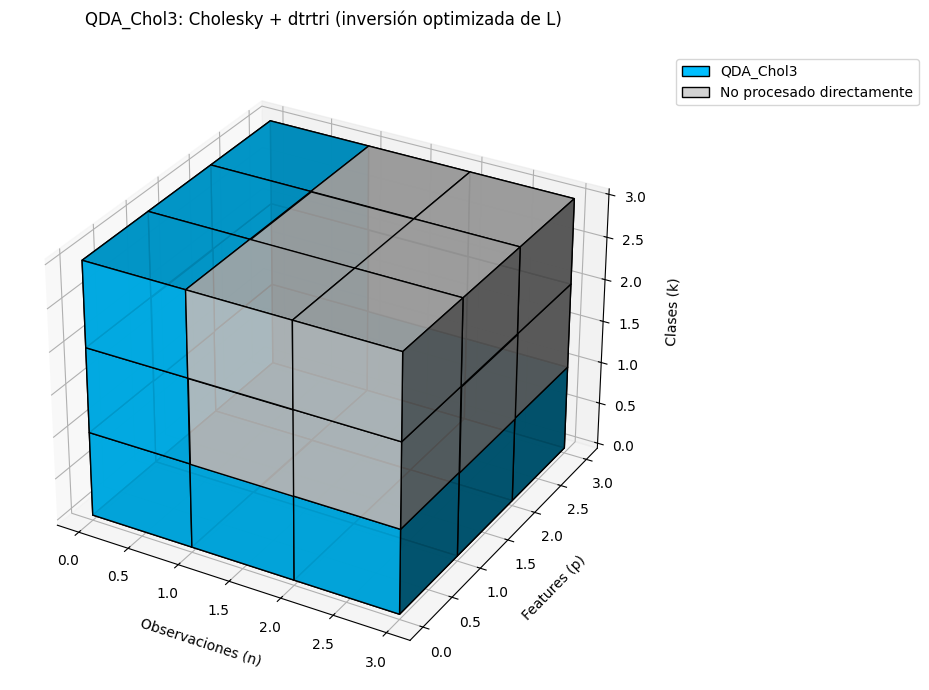

In [7]:
# Imports (solo si aún no los tenés en tu notebook)
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
from matplotlib.patches import Patch

# Función para graficar cubos (si no fue definida aún)
def plot_qda_model_cube(model_name, highlight_coords, color, explanation):
    n, p, k = 3, 3, 3
    x, y, z = np.indices((n+1, p+1, k+1))
    voxels = (x < n) & (y < p) & (z < k)

    colors = np.full(voxels.shape, 'lightgray', dtype=object)

    for i, j, l in highlight_coords:
        colors[i, j, l] = color

    fig = plt.figure(figsize=(10, 7))
    ax = fig.add_subplot(111, projection='3d')
    ax.voxels(voxels, facecolors=colors, edgecolor='k', alpha=0.9)

    ax.set_xlabel('Observaciones (n)', labelpad=10)
    ax.set_ylabel('Features (p)', labelpad=10)
    ax.set_zlabel('Clases (k)', labelpad=10)
    ax.set_title(f'{model_name}: {explanation}', pad=20)

    legend_elements = [
        Patch(facecolor=color, edgecolor='k', label=f'{model_name}'),
        Patch(facecolor='lightgray', edgecolor='k', label='No procesado directamente')
    ]
    ax.legend(handles=legend_elements, loc='upper left', bbox_to_anchor=(1.05, 1))
    plt.tight_layout()
    plt.show()

# Coordenadas activas para QDA_Chol3: similar a Chol1 (loop sobre n y k)
highlight_chol3 = [
    (i, j, k) for i in range(3) for j in range(3) for k in range(3)
    if i == 0 or k == 0
]

# Ejecutar gráfico
plot_qda_model_cube(
    model_name="QDA_Chol3",
    highlight_coords=highlight_chol3,
    color='deepskyblue',
    explanation="Cholesky + dtrtri (inversión optimizada de L)"
)


### QDA_Chol3

Esta versión es muy similar a `QDA_Chol1`, pero mejora la eficiencia usando `dtrtri`:

- `dtrtri` es una función de bajo nivel optimizada para invertir **matrices triangulares**.
- A diferencia de `np.linalg.inv()`, esta operación es más rápida y precisa cuando se trata de matrices como \( L \) (de Cholesky).

- Aun así, **mantiene los bucles sobre observaciones y clases**, sin tensorización.

**En el cubo**:
- Las celdas azul claro indican procesamiento secuencial por observación y clase.
- El costo computacional es más bajo que en `QDA_Chol1`, pero aún no hay paralelización ni vectorización total.


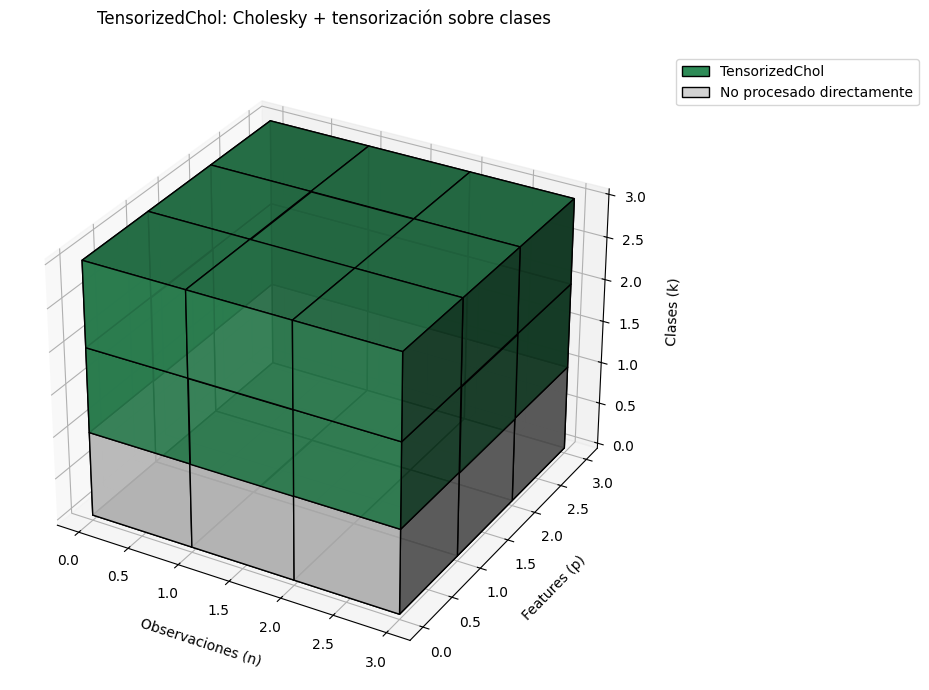

In [8]:
# Imports (si todavía no los tenés cargados en tu notebook)
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
from matplotlib.patches import Patch

# Función general para graficar un cubo QDA
def plot_qda_model_cube(model_name, highlight_coords, color, explanation):
    n, p, k = 3, 3, 3
    x, y, z = np.indices((n+1, p+1, k+1))
    voxels = (x < n) & (y < p) & (z < k)

    colors = np.full(voxels.shape, 'lightgray', dtype=object)
    for i, j, l in highlight_coords:
        colors[i, j, l] = color

    fig = plt.figure(figsize=(10, 7))
    ax = fig.add_subplot(111, projection='3d')
    ax.voxels(voxels, facecolors=colors, edgecolor='k', alpha=0.9)

    ax.set_xlabel('Observaciones (n)', labelpad=10)
    ax.set_ylabel('Features (p)', labelpad=10)
    ax.set_zlabel('Clases (k)', labelpad=10)
    ax.set_title(f'{model_name}: {explanation}', pad=20)

    legend_elements = [
        Patch(facecolor=color, edgecolor='k', label=f'{model_name}'),
        Patch(facecolor='lightgray', edgecolor='k', label='No procesado directamente')
    ]
    ax.legend(handles=legend_elements, loc='upper left', bbox_to_anchor=(1.05, 1))
    plt.tight_layout()
    plt.show()

# Coordenadas resaltadas: tensoriza sobre clases (k != 0)
highlight_tensorized_chol = [
    (i, j, k) for i in range(3) for j in range(3) for k in range(3)
    if k != 0
]

# Generar gráfico
plot_qda_model_cube(
    model_name="TensorizedChol",
    highlight_coords=highlight_tensorized_chol,
    color='seagreen',
    explanation="Cholesky + tensorización sobre clases"
)


### TensorizedChol

Esta variante combina:

- La eficiencia de la **factorización de Cholesky** para evitar invertir matrices completas.
- La **tensorización sobre las clases**, que permite calcular para todas las clases en paralelo.

Aunque no tensoriza completamente (todavía hay iteración sobre observaciones), es un gran paso hacia modelos más rápidos y eficientes.

**En el cubo**:
- Las celdas verdes indican que se procesan **todas las clases a la vez**.
- Las observaciones aún se recorren de forma individual.


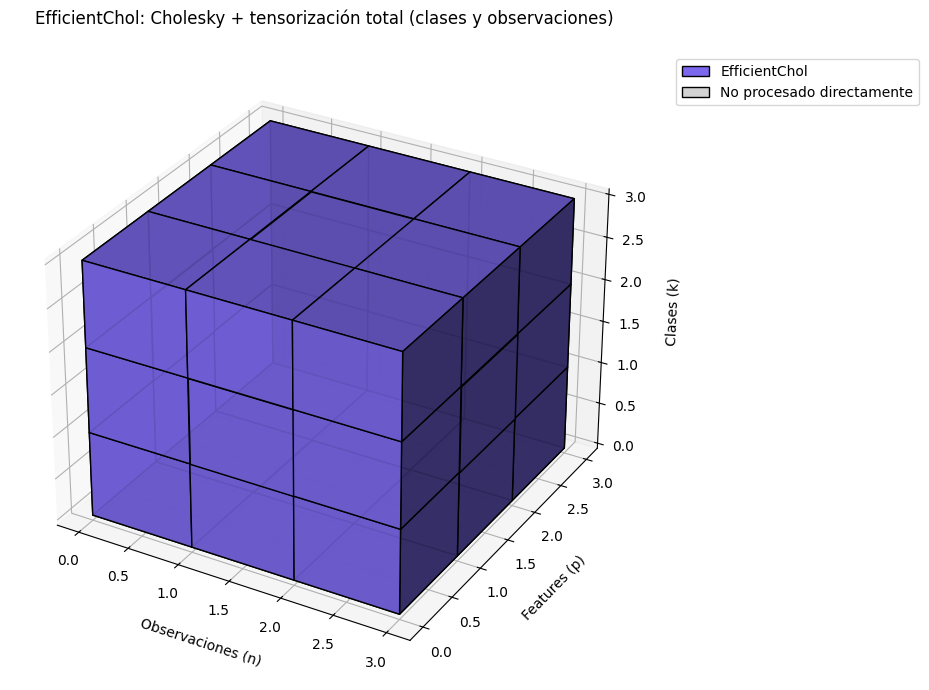

In [9]:
# Imports (si aún no los cargaste)
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
from matplotlib.patches import Patch

# Función para graficar cubos (reutilizable)
def plot_qda_model_cube(model_name, highlight_coords, color, explanation):
    n, p, k = 3, 3, 3
    x, y, z = np.indices((n+1, p+1, k+1))
    voxels = (x < n) & (y < p) & (z < k)

    colors = np.full(voxels.shape, 'lightgray', dtype=object)

    for i, j, l in highlight_coords:
        colors[i, j, l] = color

    fig = plt.figure(figsize=(10, 7))
    ax = fig.add_subplot(111, projection='3d')
    ax.voxels(voxels, facecolors=colors, edgecolor='k', alpha=0.9)

    ax.set_xlabel('Observaciones (n)', labelpad=10)
    ax.set_ylabel('Features (p)', labelpad=10)
    ax.set_zlabel('Clases (k)', labelpad=10)
    ax.set_title(f'{model_name}: {explanation}', pad=20)

    legend_elements = [
        Patch(facecolor=color, edgecolor='k', label=f'{model_name}'),
        Patch(facecolor='lightgray', edgecolor='k', label='No procesado directamente')
    ]
    ax.legend(handles=legend_elements, loc='upper left', bbox_to_anchor=(1.05, 1))
    plt.tight_layout()
    plt.show()

# Coordenadas resaltadas: procesamiento completo (n, p, k)
highlight_efficient_chol = [
    (i, j, k) for i in range(3) for j in range(3) for k in range(3)
]

# Ejecutar gráfico
plot_qda_model_cube(
    model_name="EfficientChol",
    highlight_coords=highlight_efficient_chol,
    color='mediumslateblue',
    explanation="Cholesky + tensorización total (clases y observaciones)"
)


### EfficientChol

Este modelo combina lo mejor de todos los anteriores:

- **Cholesky**: evita invertir matrices de covarianza completas.
- **Tensorización total**: calcula simultáneamente para todas las observaciones (`n`) y clases (`k`).

Es el modelo más eficiente tanto en tiempo de entrenamiento como en predicción, logrando velocidad sin sacrificar precisión.

**En el cubo**:
- Todas las celdas están resaltadas en violeta, lo que indica procesamiento vectorizado total en las tres dimensiones: observaciones, variables y clases.
